In [ ]:
import os
import subprocess
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
folder_path = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/dataset_new/real"
dirs = [os.path.join(folder_path,d) for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

In [ ]:
commands = []
python_script = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/main.py"
for dir in dirs:
    for seeds in [1, 2]:
        cmd = f'/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python {python_script} --seed {seeds} --experiment_path {dir}  --is_real'
        commands.append(cmd)


In [ ]:
for i, cmd in tqdm(enumerate(commands, 1)):
    print(f"\n▶️ Running command {i}/{len(commands)}:\n{cmd}\n")
    
    result = subprocess.run(cmd, shell=True)

    if result.returncode != 0:
        print(f"❌ Command failed with exit code {result.returncode}:")
        print(cmd)
        break
    else:
        print(f"✅ Completed {i}/{len(commands)}\n")

In [ ]:
for i, cmd in tqdm(enumerate(commands, 1)):
    print(f"\n▶️ Running command {i}/{len(commands)}:\n{cmd}\n")
    
    result = subprocess.run(cmd, shell=True)

    if result.returncode != 0:
        print(f"❌ Command failed with exit code {result.returncode}:")
        print(cmd)
        break
    else:
        print(f"✅ Completed {i}/{len(commands)}\n")

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("model_results/input_output2_constr_real.csv")
df[["c", "r", "b", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)


In [33]:
df

,model1_mae,model2_mae,y_test_violation,model_1_violation_0.0001,model_2_violation_0.0001,model_1_violation_0.001,model_2_violation_0.001,model_1_violation_0.01,model_2_violation_0.01,model_1_violation_loss,model_2_violation_loss,experiment_path,seed,constraints_weight,c,r,b,data_seed
0,0.057588,0.053606,0.0,0.896000,0.794667,0.890667,0.784000,0.828000,0.732000,0.254560,0.204576,2_1.5_2_2,1,0.0,2,1.5,2,2
1,0.064468,0.051232,0.0,0.796000,0.824000,0.792000,0.816000,0.728000,0.730667,0.135952,0.161871,2_1.5_2_2,1,0.1,2,1.5,2,2
2,0.071724,0.053322,0.0,0.616000,0.876000,0.606667,0.869333,0.549333,0.802667,0.076365,0.163457,2_1.5_2_2,1,0.3,2,1.5,2,2
3,0.081707,0.053861,0.0,0.505333,0.752000,0.497333,0.740000,0.440000,0.684000,0.049755,0.152057,2_1.5_2_2,1,0.5,2,1.5,2,2
4,0.072614,0.071303,0.0,0.724000,0.721333,0.724000,0.721333,0.720000,0.705333,0.445594,0.432166,5_1.5_2_1,1,0.0,5,1.5,2,1
5,0.081820,0.073674,0.0,0.768000,0.726667,0.768000,0.722667,0.748000,0.713333,0.289680,0.380546,5_1.5_2_1,1,0.1,5,1.5,2,1
6,0.106361,0.073757,0.0,0.716000,0.701333,0.713333,0.697333,0.684000,0.678667,0.151244,0.336666,5_1.5_2_1,1,0.3,5,1.5,2,1
7,0.124091,0.075927,0.0,0.728000,0.689333,0.724000,0.689333,0.688000,0.674667,0.131014,0.332985,5_1.5_2_1,1,0.5,5,1.5,2,1
8,0.068364,0.064788,0.0,0.725333,0.713333,0.724000,0.713333,0.712000,0.702667,0.347919,0.329462,4_1.5_2_1,1,0.0,4,1.5,2,1
9,0.077570,0.063541,0.0,0.686667,0.701333,0.686667,0.700000,0.665333,0.678667,0.187336,0.256180,4_1.5_2_1,1,0.1,4,1.5,2,1


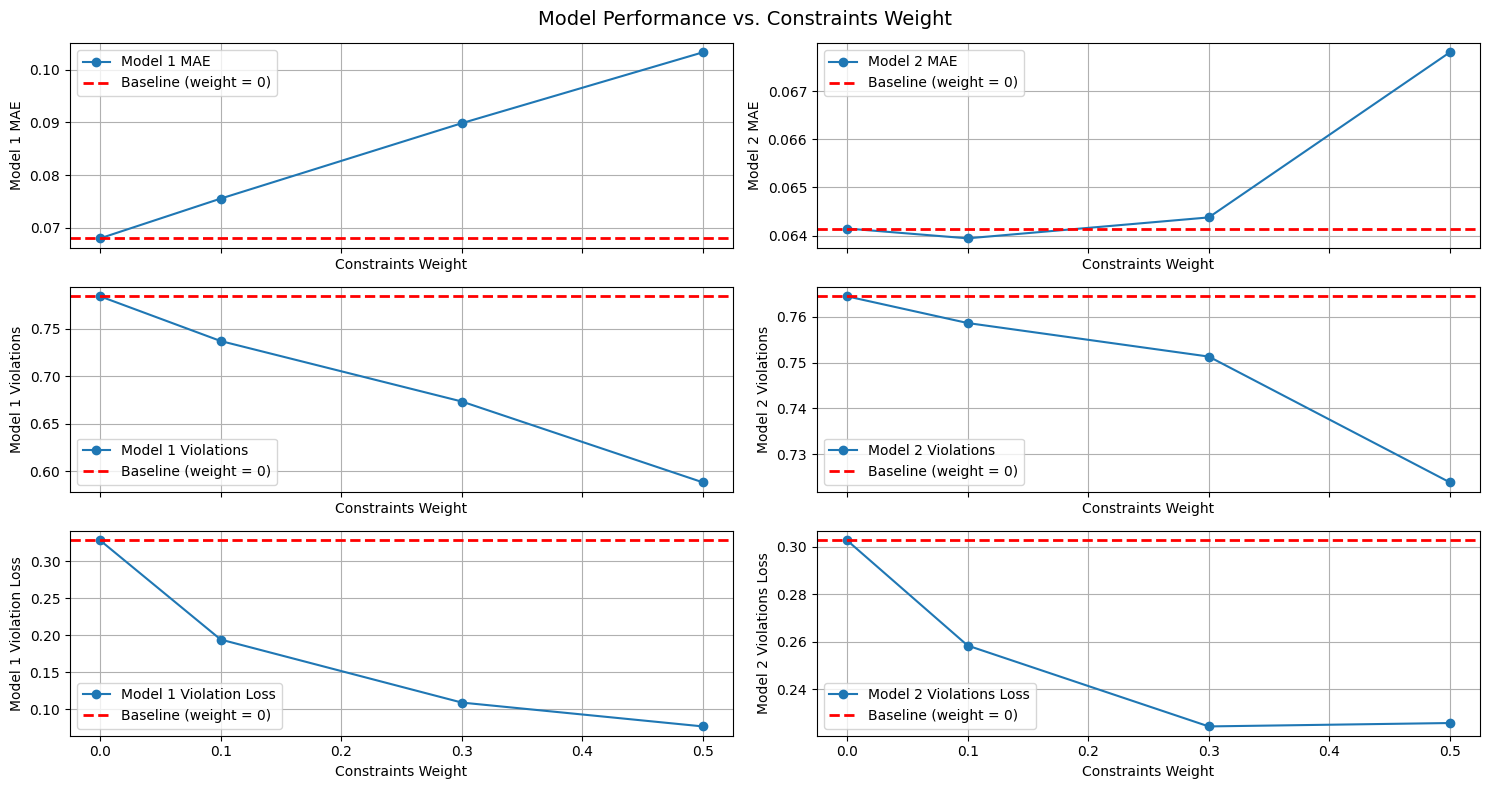

In [43]:
import matplotlib.pyplot as plt

# Aggregate with consistent column names
grouped = (
    df.groupby("constraints_weight")
      .agg(
          model1_mae=("model1_mae", "mean"),
          model2_mae=("model2_mae", "mean"),
          model_1_violation_0_0001=("model_1_violation_0.0001", "mean"),
          model_2_violation_0_0001=("model_2_violation_0.0001", "mean"),
          model_1_violation_loss=("model_1_violation_loss", "mean"),
          model_2_violation_loss=("model_2_violation_loss", "mean"),
      )
      .reset_index()
)

# Ensure baseline exists
if (grouped["constraints_weight"] == 0).any():
    baseline = grouped[grouped["constraints_weight"] == 0].iloc[0]
else:
    raise ValueError("No baseline found for constraints_weight = 0")

fig, axes = plt.subplots(3, 2, figsize=(15, 8), sharex=True)
axes = axes.flatten()

metrics = [
    ("model1_mae", "Model 1 MAE"),
    ("model2_mae", "Model 2 MAE"),
    ("model_1_violation_0_0001", "Model 1 Violations"),
    ("model_2_violation_0_0001", "Model 2 Violations"),
    ("model_1_violation_loss", "Model 1 Violation Loss"),
    ("model_2_violation_loss", "Model 2 Violations Loss"),
]

for ax, (metric, ylabel) in zip(axes, metrics):
    ax.plot(
        grouped["constraints_weight"],
        grouped[metric],
        marker="o",
        label=ylabel
    )
    ax.axhline(
        y=baseline[metric],
        color="red",
        linestyle="--",
        linewidth=2,
        label="Baseline (weight = 0)"
    )
    ax.set_xlabel("Constraints Weight")
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.legend()

fig.suptitle("Model Performance vs. Constraints Weight", fontsize=14)
plt.tight_layout()
plt.show()


In [67]:
baseline

,constraints_weight,model1_mae,model2_mae,model_1_violation_0_0001,model_2_violation_0_0001
c,,,,,
2,0.0,0.045306,0.041600,0.694111,0.683000
3,0.0,0.052177,0.049352,0.634296,0.619037
4,0.0,0.057004,0.055457,0.648296,0.638630
5,0.0,0.062989,0.062363,0.659000,0.654037


In [81]:
grouped

,constraints_weight,c,model1_mae,model2_mae,model_1_violation_0_0001,model_2_violation_0_0001,model_1_violation_loss,model_2_violation_loss
0,0.0,2,0.059233,0.053407,0.848000,0.804667,0.227077,0.186245
1,0.0,3,0.064110,0.061044,0.760667,0.720000,0.283604,0.249481
2,0.0,4,0.069386,0.064367,0.734667,0.752000,0.346059,0.328143
3,0.0,5,0.079352,0.077763,0.794000,0.781333,0.455214,0.446644
4,0.1,2,0.063691,0.050857,0.759333,0.814667,0.121955,0.158022
5,0.1,3,0.070950,0.059405,0.692000,0.682667,0.152885,0.205968
6,0.1,4,0.077989,0.065940,0.699333,0.741333,0.205140,0.277020
7,0.1,5,0.089586,0.079565,0.798000,0.796000,0.296502,0.392451
8,0.3,2,0.071556,0.052816,0.666000,0.828667,0.079685,0.148737
9,0.3,3,0.081533,0.056987,0.594667,0.678000,0.081279,0.162694


0     False
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13     True
14    False
15    False
Name: c, dtype: bool

In [88]:
grouped[grouped.c == "2"]

,constraints_weight,c,model1_mae,model2_mae,model_1_violation_0_0001,model_2_violation_0_0001,model_1_violation_loss,model_2_violation_loss
0,0.0,2,0.059233,0.053407,0.848000,0.804667,0.227077,0.186245
4,0.1,2,0.063691,0.050857,0.759333,0.814667,0.121955,0.158022
8,0.3,2,0.071556,0.052816,0.666000,0.828667,0.079685,0.148737
12,0.5,2,0.080810,0.053972,0.524667,0.780000,0.049473,0.152447


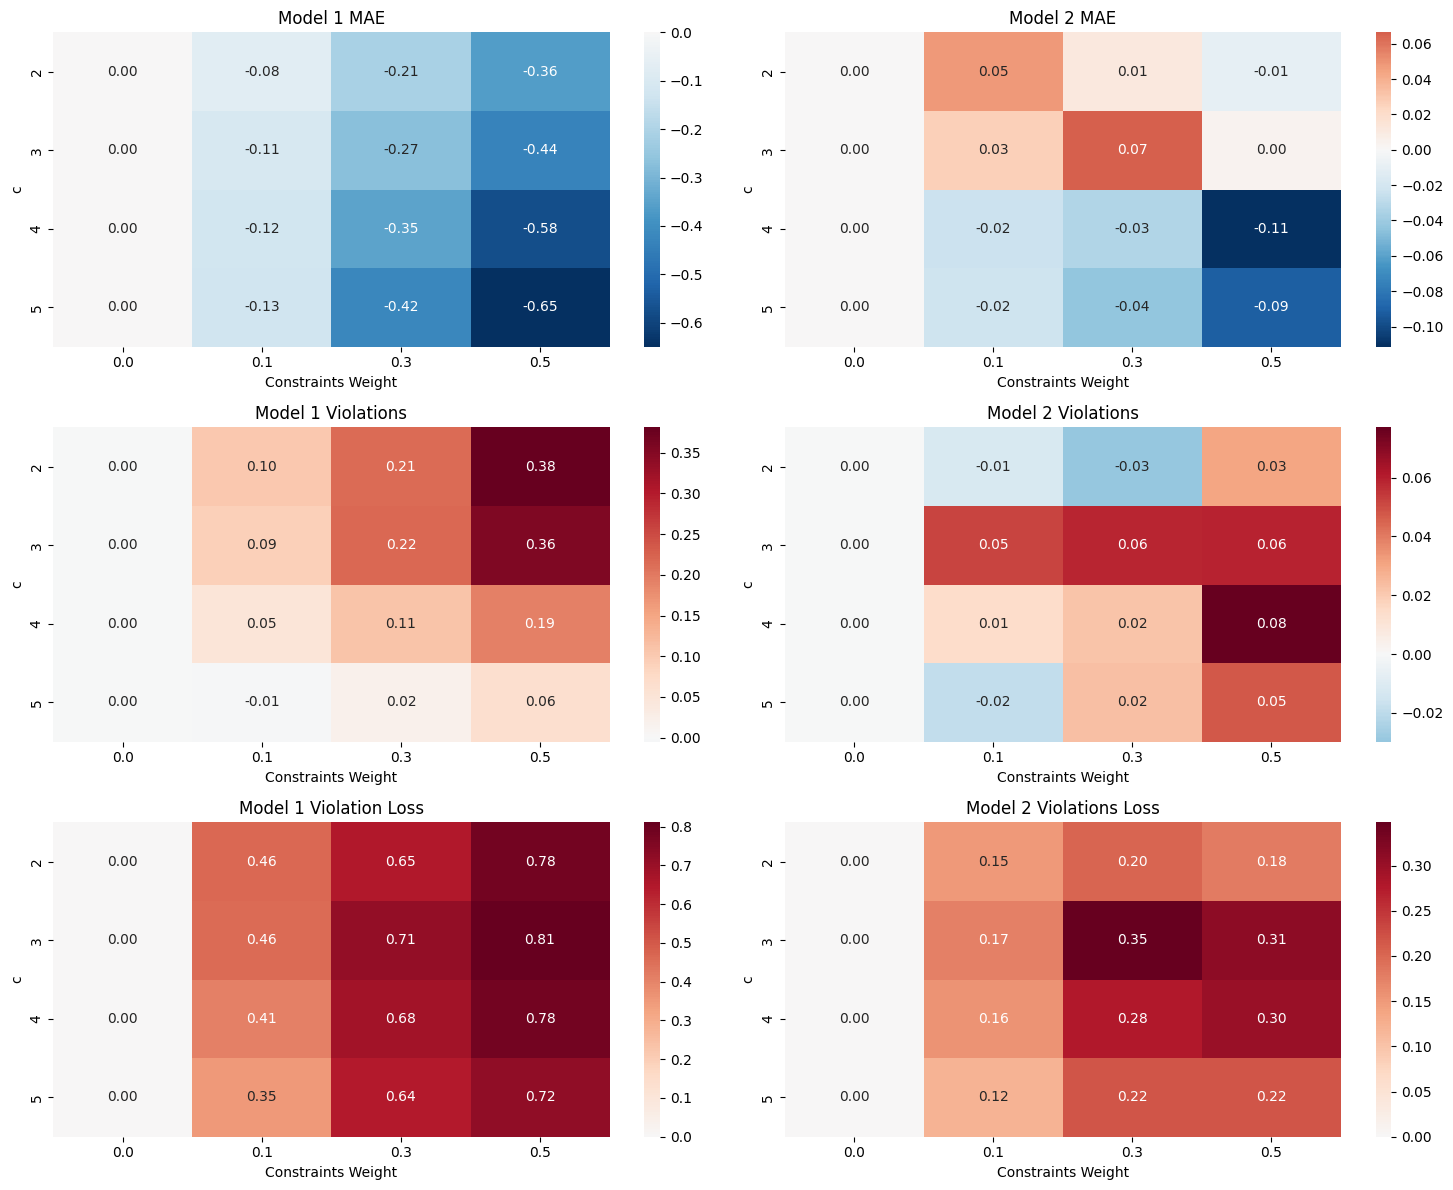

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Aggregate
grouped = (
    df.groupby(["constraints_weight", "c"], as_index=False)
      .agg(
          model1_mae=("model1_mae", "mean"),
          model2_mae=("model2_mae", "mean"),
          model_1_violation_0_0001=("model_1_violation_0.0001", "mean"),
          model_2_violation_0_0001=("model_2_violation_0.0001", "mean"),
          model_1_violation_loss=("model_1_violation_loss", "mean"),
          model_2_violation_loss=("model_2_violation_loss", "mean"),
      )
)

# Compute relative change vs baseline (constraints_weight = 0)
baseline = grouped[grouped["constraints_weight"] == 0].set_index("c")

metrics = [
    "model1_mae",
    "model2_mae",
    "model_1_violation_0_0001",
    "model_2_violation_0_0001",
    "model_1_violation_loss",
    "model_2_violation_loss",
]

rel = grouped.copy()
for m in metrics:
    rel[m] =  (rel["c"].map(baseline[m]) - rel[m]) / rel["c"].map(baseline[m]) 

# Plot heatmaps
titles = [
    "Model 1 MAE",
    "Model 2 MAE",
    "Model 1 Violations",
    "Model 2 Violations",
    "Model 1 Violation Loss",
    "Model 2 Violations Loss",
]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for ax, metric, title in zip(axes, metrics, titles):
    heatmap_data = rel.pivot(
        index="c",
        columns="constraints_weight",
        values=metric
    )
    
    sns.heatmap(
        heatmap_data,
        ax=ax,
        cmap="RdBu_r",
        center=0,
        annot=True,
        fmt=".2f"
    )
    
    ax.set_title(title)
    ax.set_xlabel("Constraints Weight")
    ax.set_ylabel("c")

plt.tight_layout()
plt.show()


In [44]:
df = pd.read_csv("model_results/input_output2_constr_fuzz.csv")

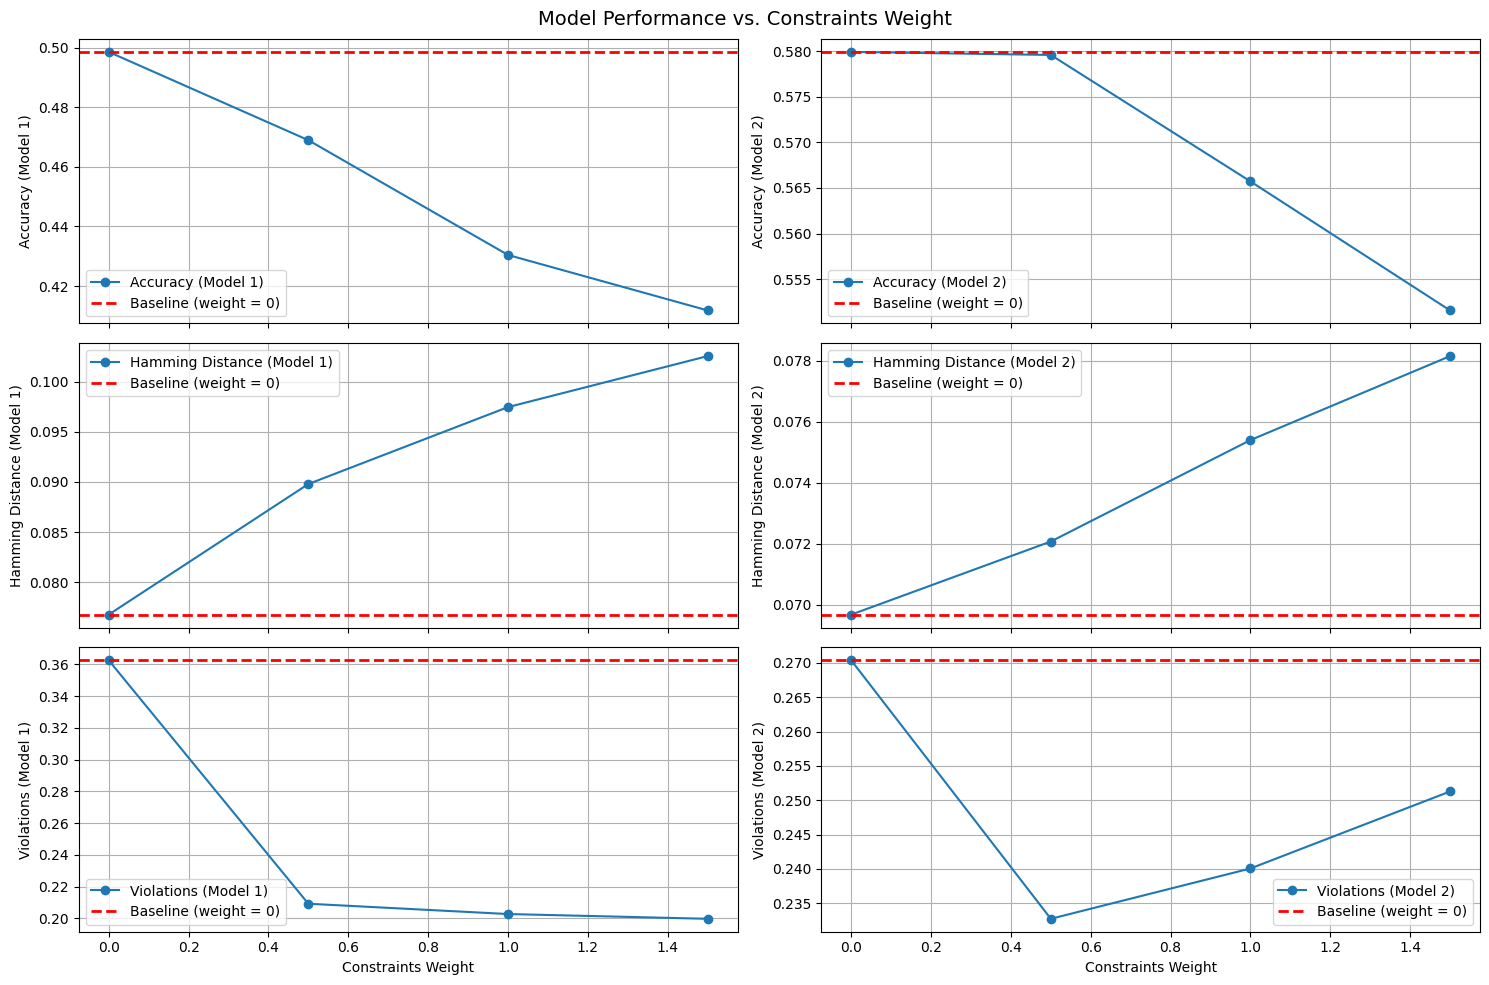

In [46]:
import matplotlib.pyplot as plt

grouped = (
    df.groupby("constraints_weight")
      .agg(
          hammingm1=("model1_hamming", "mean"),
          hammingm2=("model2_hamming", "mean"),
          accuracym1=("model1_accuracy", "mean"),
          accuracym2=("model2_accuracy", "mean"),
          violationsm1=("model_1_violation", "mean"),
          violationsm2=("model_2_violation", "mean"),
      )
      .reset_index()
)

# Ensure baseline exists
if (grouped["constraints_weight"] == 0).any():
    baseline = grouped[grouped["constraints_weight"] == 0].iloc[0]
else:
    raise ValueError("No baseline found for constraints_weight = 0")

fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True)

plots = [
    ("accuracym1", "Accuracy (Model 1)"),
    ("accuracym2", "Accuracy (Model 2)"),
    ("hammingm1", "Hamming Distance (Model 1)"),
    ("hammingm2", "Hamming Distance (Model 2)"),
    ("violationsm1", "Violations (Model 1)"),
    ("violationsm2", "Violations (Model 2)"),
]

for ax, (metric, ylabel) in zip(axes.flatten(), plots):
    ax.plot(
        grouped["constraints_weight"],
        grouped[metric],
        marker="o",
        label=ylabel
    )
    ax.axhline(
        y=baseline[metric],
        color="red",
        linestyle="--",
        linewidth=2,
        label="Baseline (weight = 0)"
    )
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.legend()

# X label only on bottom row
for ax in axes[-1]:
    ax.set_xlabel("Constraints Weight")

fig.suptitle("Model Performance vs. Constraints Weight", fontsize=14)
plt.tight_layout()
plt.show()


In [49]:
df = pd.read_csv("model_results/input_output2_real.csv")
df[["c", "r", "b", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)


In [52]:
df

,model1_mae,model2_mae,y_test_violation,model_1_violation_0.0001,model_2_violation_0.0001,model_1_violation_0.001,model_2_violation_0.001,model_1_violation_0.01,model_2_violation_0.01,model_1_violation_loss,model_2_violation_loss,experiment_path,seed,constraints_weight,c,r,b,data_seed
0,0.066349,0.064682,0.0,0.744000,0.741333,0.742667,0.737333,0.724000,0.726667,0.340961,0.314072,3_1.0_2_2,1,0.0,3,1.0,2,2
1,0.059179,0.056008,0.0,0.738667,0.690667,0.738667,0.686667,0.721333,0.654667,0.294028,0.269603,3_1.0_2_2,2,0.0,3,1.0,2,2
2,0.057588,0.053606,0.0,0.896000,0.794667,0.890667,0.784000,0.828000,0.732000,0.254560,0.204576,2_1.5_2_2,1,0.0,2,1.5,2,2
3,0.054519,0.051117,0.0,0.822667,0.854667,0.817333,0.841333,0.762667,0.788000,0.245058,0.204299,2_1.5_2_2,2,0.0,2,1.5,2,2
4,0.040491,0.038784,0.0,0.456000,0.440000,0.454667,0.440000,0.442667,0.421333,0.180330,0.170023,5_0.5_1_1,1,0.0,5,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.062834,0.060585,0.0,0.813333,0.836000,0.812000,0.834667,0.782667,0.792000,0.282245,0.274327,2_1.0_3_2,2,0.0,2,1.0,3,2
140,0.074742,0.073775,0.0,0.826667,0.842667,0.825333,0.842667,0.798667,0.832000,0.362216,0.396374,3_1.5_3_2,1,0.0,3,1.5,3,2
141,0.075267,0.075358,0.0,0.837333,0.850667,0.837333,0.848000,0.817333,0.822667,0.402088,0.393649,3_1.5_3_2,2,0.0,3,1.5,3,2
142,0.040272,0.037372,0.0,0.450667,0.428000,0.450667,0.425333,0.438667,0.417333,0.160006,0.141953,4_0.5_2_2,1,0.0,4,0.5,2,2


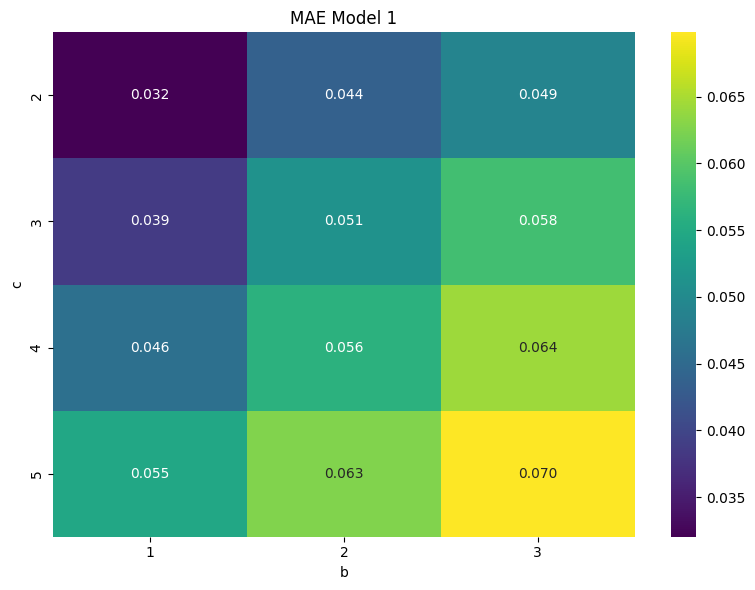

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate
heatmap_data = (
    df.groupby(["c", "b"])["model2_mae"]
      .mean()
      .unstack()   # rows = c, columns = b
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    cmap="viridis",
    annot=True,
    fmt=".3f"
)

plt.xlabel("b")
plt.ylabel("c")
plt.title("MAE Model 1")
plt.tight_layout()
plt.show()

In [ ]:
grouped = (
    df.groupby(["r", "constraints_weight"])
      .agg(
          hamming=("model1_hamming", "mean"),
          accuracy=("model1_accuracy", "mean"),
          violations=("model_1_violation", "mean"),
      )
      .reset_index()
)


fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

metrics = [
    ("accuracy", "Accuracy"),
    ("hamming", "Hamming Distance"),
    ("violations", "Violations"),
]

for ax, (metric, ylabel) in zip(axes, metrics):
    for r_val, g in grouped.groupby("r"):
        ax.plot(
            g["constraints_weight"],
            g[metric],
            marker="o",
            label=f"r = {r_val}"
        )

    ax.set_xlabel("Constraints Weight")
    ax.set_ylabel(ylabel)
    ax.grid(True)

axes[0].legend(title="r")
fig.suptitle("Model Performance vs. Constraints Weight Across r", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Extract baselines for each r
baselines = (
    grouped[grouped["constraints_weight"] == 0]
    .set_index("c")[["accuracy", "hamming", "violations"]]
)

# Join baselines back
grouped = grouped.join(
    baselines,
    on="c",
    rsuffix="_baseline"
)

# Difference from baseline
grouped["accuracy_diff"] = grouped["accuracy"] - grouped["accuracy_baseline"]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
heatmap_data = grouped.pivot(
    index="r",
    columns="constraints_weight",
    values="accuracy_diff"
)
plt.figure(figsize=(10, 6))

sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".3f",
    cbar_kws={"label": "Δ Accuracy (vs. weight = 0)"}
)

plt.xlabel("Constraints Weight")
plt.ylabel("r")
plt.title("Accuracy Change Relative to Baseline (weight = 0)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_c = (
    df.groupby(["c", "constraints_weight"])
      .agg(
          accuracy=("model1_accuracy", "mean"),
          hamming=("model1_hamming", "mean"),
          violations=("model_1_violation", "mean"),
      )
      .reset_index()
)


In [ ]:
# Baselines for each c
baselines_c = (
    grouped_c[grouped_c["constraints_weight"] == 0]
    .set_index("c")[["accuracy", "hamming", "violations"]]
)

# Join baselines back
grouped_c = grouped_c.join(
    baselines_c,
    on="c",
    rsuffix="_baseline"
)

# Difference from baseline (accuracy: higher is better)
grouped_c["accuracy_diff"] = (
    grouped_c["accuracy"] - grouped_c["accuracy_baseline"]
)
grouped_c["hamming_diff"] = (
    grouped_c["hamming"] - grouped_c["hamming_baseline"]
)


In [ ]:
heatmap_data_c = grouped_c.pivot(
    index="c",
    columns="constraints_weight",
    values="hamming_diff"
)

plt.figure(figsize=(10, 6))

sns.heatmap(
    heatmap_data_c,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".3f",
    cbar_kws={"label": "Δ Hamming (vs. weight = 0)"}
)

plt.xlabel("Constraints Weight")
plt.ylabel("c")
plt.title("Hamming Change Relative to Baseline (weight = 0)")
plt.tight_layout()
plt.show()
